### Analyse van jaarpatroon

importeren bluebelt en basis instellingen

In [14]:
import bluebelt as blue

In [15]:
blue.set_style("fat")
blue.set_figsize_in_pixels(700, 450)
blue.set_language('nl')
blue.set_transparent(False)

dummy data aanmaken en weergeven

In [16]:
frame = blue.create.frame(1, 4) # 1 jaar, 4 skills
frame

,skill A,skill B,skill C,skill D
2022-01-03,455.25,504.00,510.75,558.25
2022-01-04,434.25,395.25,355.75,438.75
2022-01-05,424.25,415.00,426.25,473.75
2022-01-06,328.50,426.25,444.25,337.75
2022-01-07,493.75,402.00,457.50,525.50
...,...,...,...,...
2022-12-28,571.25,669.00,479.50,458.25
2022-12-29,507.25,502.50,630.75,642.75
2022-12-30,810.25,781.50,655.75,798.50
2022-12-31,175.50,159.00,160.75,178.75


polynoom van het jaarpatroon van alle skills samen

-------
  obj
-------

input variables
--------------------------------------------------
  _obj size:                    254
  validation type:              rsq
  validation threshold:         0.0500

pattern
--------------------------------------------------
  shape:                        3
  r squared:                    0.21

residuals
--------------------------------------------------
  bounds level:                 80%
  bounds size:                  446.57
  standard deviation:           174.23
  p-value normal distribution:  0.4502
  outliers:                     17



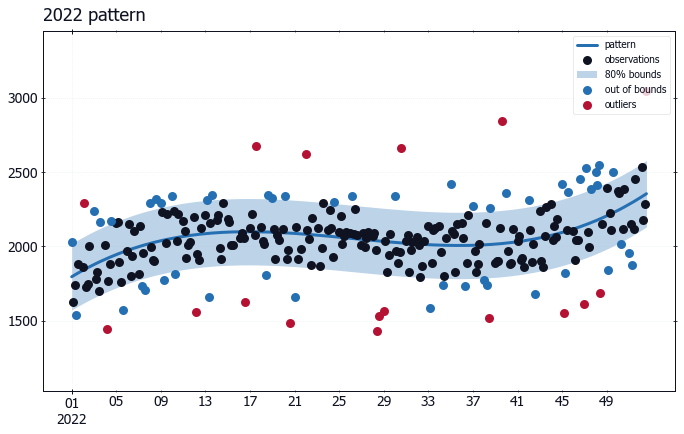

In [17]:
poly = frame.sum(axis=1)._.workdays(drop=True)._.pattern.polynomial()
print(poly)
poly.plot(title='2022 pattern')

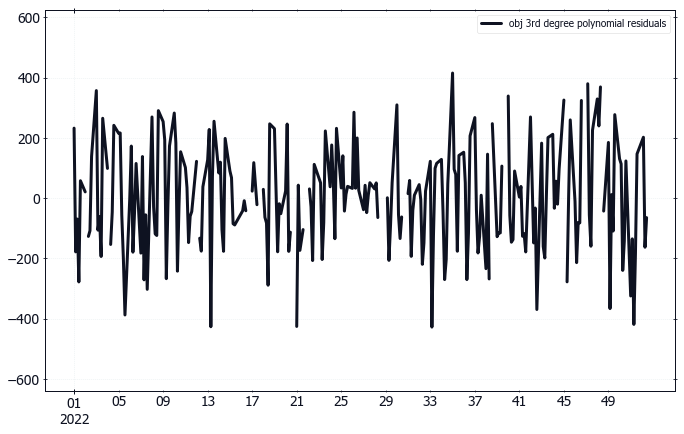

In [18]:
poly.residuals._.line()

DAgostinoPearson(nrows=254, ncols=1, alpha=0.05, p_value=0.45, passed=True)


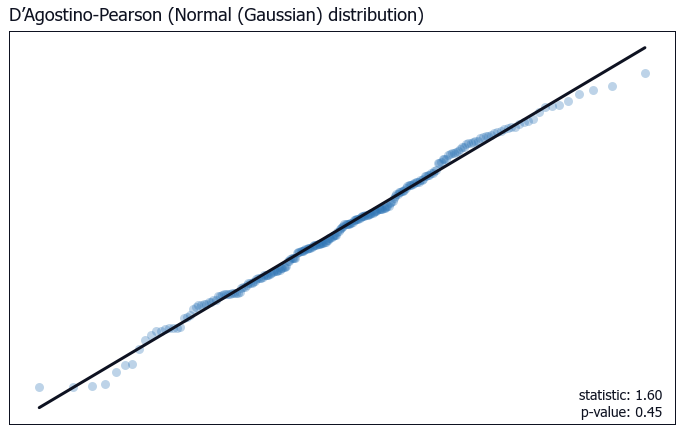

In [19]:
norm = poly.residuals._.stats.normal_distribution()
print(norm)
norm.plot()

polynomen per skill

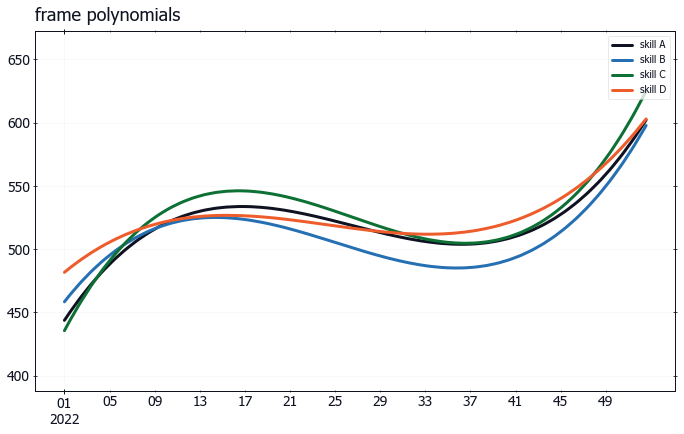

In [20]:
frame._.workdays(drop=True)._.polynomial().plot(bounds=False)

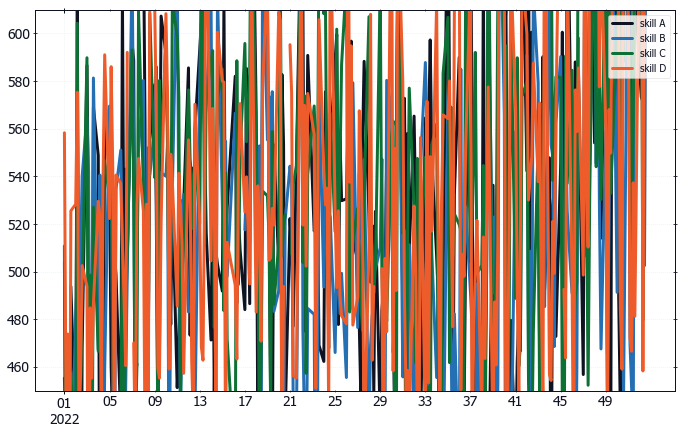

In [21]:
# even om weer te geven dat de werkelijkheid een stuk complexer is dan het patroon
frame._.workdays(drop=True)._.line(ylim=(450, 610))

patroon per skill

In [22]:
# for skill in frame.columns: # voor alle skills
for skill in frame.columns[:1]: # voor alleen de eerste skill
    poly = frame[skill]._.workdays(drop=True)._.pattern.polynomial()
    print(poly)
    poly.plot(title=f'2022 pattern {skill}', xlabel='year-week', ylabel='hours', path=f"../results/{skill} polynomial.png")

-----------
  skill A
-----------

input variables
--------------------------------------------------
  _obj size:                    254
  validation type:              rsq
  validation threshold:         0.0500

pattern
--------------------------------------------------
  shape:                        3
  r squared:                    0.15

residuals
--------------------------------------------------
  bounds level:                 80%
  bounds size:                  156.18
  standard deviation:           60.93
  p-value normal distribution:  0.0713
  outliers:                     11



periodiek patroon

Periodical(n=254, rule=4w, how=mean, confidence=0.8, outlier_sigma=2, adjust=True, outliers=14)


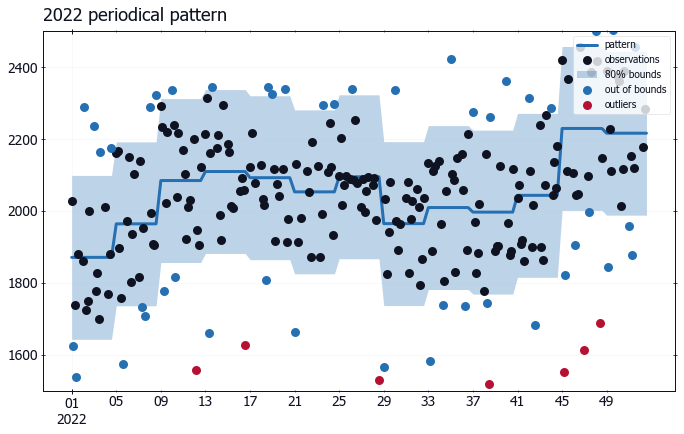

In [23]:
peri = frame.sum(axis=1)._.workdays(drop=True)._.pattern.periodical('4w')
print(peri)

# voor de zichtbaarheid ylim=(1500, 2500)
peri.plot(title='2022 periodical pattern', ylim=(1500, 2500))

In [24]:
# en oh ja, de style aanpassen gaat best snel
blue.set_style("paper")

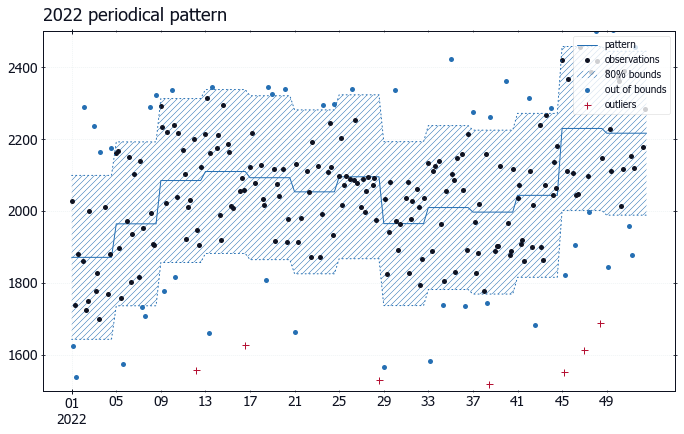

In [25]:
peri.plot(title='2022 periodical pattern', ylim=(1500, 2500))